## Project Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@465e45d7

This `Op` takes an N-dimensional `RandomAccessibleInterval` as input and performs an operation defined by the user along each line of pixels in a given dimension, producing for each line a value that is then stored in a provided (N-1)-dimensional output. `project` is called as follows:

In [2]:
ij.op().help('project')

Available operations:
	(IterableInterval out) =
	net.imagej.ops.transform.project.DefaultProjectParallel(
		IterableInterval out,
		RandomAccessibleInterval in,
		UnaryComputerOp method,
		int dim)
	(IterableInterval out) =
	net.imagej.ops.transform.project.ProjectRAIToII(
		IterableInterval out,
		RandomAccessibleInterval in,
		UnaryComputerOp method,
		int dim)
	(IterableInterval out) =
	net.imagej.ops.transform.project.ProjectRAIToIterableInterval(
		IterableInterval out,
		RandomAccessibleInterval in,
		UnaryComputerOp method,
		int dim)

Note that all of the `project` `Op`s take the same parameters, so the choice on which `Op` to run is left to the `Op` Matcher.

[INFO] Populating metadata
[INFO] Populating metadata


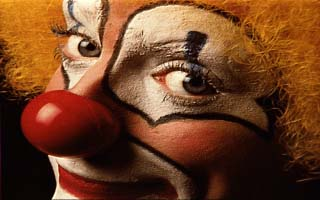

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.jpg")

ij.notebook().display(input)

This clown has 3 channels, which are expressed as a third dimension. If we want to do some stats on the channels, we can use `project` to provide a image representation. Note that we have to create an `Op` instance (which we will call `statsOp`) that tells `project` what to do. Let's find the mean of all of the channels, which provides a nice grayscale image:

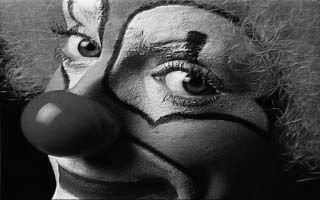

In [4]:
import net.imglib2.FinalInterval

//create the output using only the first two dimensions of the input
interval = new FinalInterval(input.dimension(0), input.dimension(1))
imgType = input.firstElement()
projected = ij.op().create().img(interval, imgType)

//create the stats Op instance using op()
statsOp = ij.op().op("stats.mean", input)

//do the projection in the second dimension
projectDim = 2

ij.op().run("project", projected, input, statsOp, projectDim)

ij.notebook().display(projected)

There are many other [`stats` `Op`s](../stats) that can be used through `project`, but all `UnaryComputerOp`s can be used by `project`.